# Task 6 - GRIPJUNE21

## _Author_:Manoj Prabakar D

# Decision Tree classifier - Iris dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set. The data set consists of **150 samples** from each of three species of Iris **(Iris setosa-0, Iris virginica-1 and Iris versicolor-2)**. Four features were measured from each sample: the length and the width of the sepals and petals, in __centimeters__. 

## Objective:*Classify a new flower as belonging to one of the 3 classes present in the data set.*

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the Iris dataset

In [2]:
iris_set = datasets.load_iris()
iris = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris["species"] = iris_set.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [5]:
#how many data points for each class are present?
iris["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

Since all the classes are equally present, hence iris dataset is a balanced dataset 

### Find missing values

In [6]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

* The variables have no missing values

### EDA:Visualising the distribution of sepal and petal dimensions

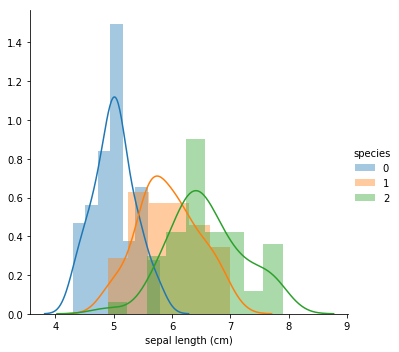

In [7]:
sns.FacetGrid(iris,hue="species",size=5) \
   .map(sns.distplot,'sepal length (cm)') \
   .add_legend();


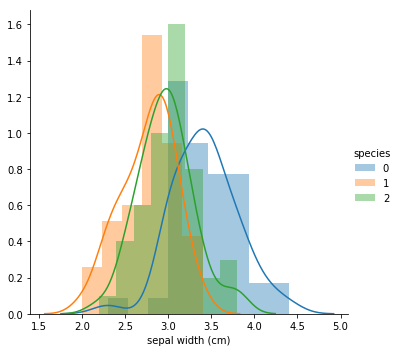

In [8]:
sns.FacetGrid(iris,hue="species",size=5) \
   .map(sns.distplot,'sepal width (cm)') \
   .add_legend();

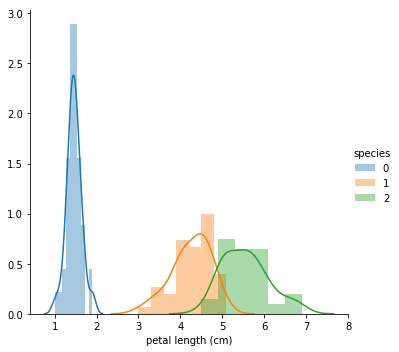

In [9]:
sns.FacetGrid(iris,hue="species",size=5) \
   .map(sns.distplot,'petal length (cm)') \
   .add_legend();

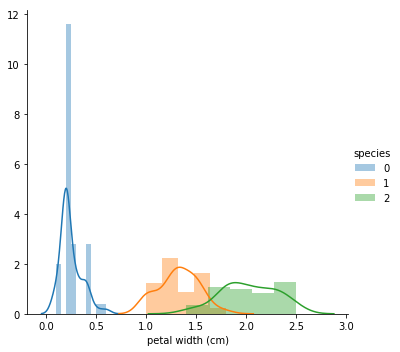

In [10]:
sns.FacetGrid(iris,hue="species",size=5) \
   .map(sns.distplot,'petal width (cm)') \
   .add_legend();

From the visualization it is found that petal length and petal width distinguishes the species better from one another compared to sepal length and sepal width.

### Analysing correlation between feature and Target

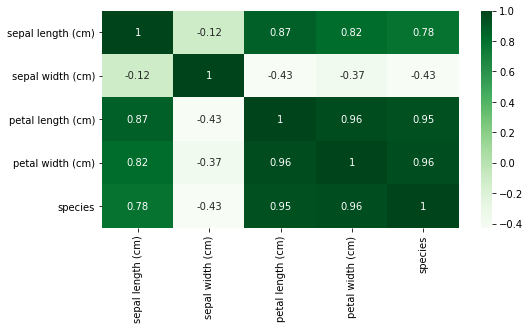

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='Greens');

The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

### Splitting The Data into Training And Testing Dataset

In [13]:
X=iris.drop('species',axis=1)
y=iris['species']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [15]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [16]:
y_train.shape,y_test.shape

((120,), (30,))

In [17]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, y_test))

The accuracy of Decision Tree is: 0.9666666666666667


Test accuracy is 96.7%, hence we can now fit the model for entire data and test for the new data.

In [21]:
model1 = DecisionTreeClassifier()
model1.fit(X,y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


### Let us visualize the Decision Tree to understand it better

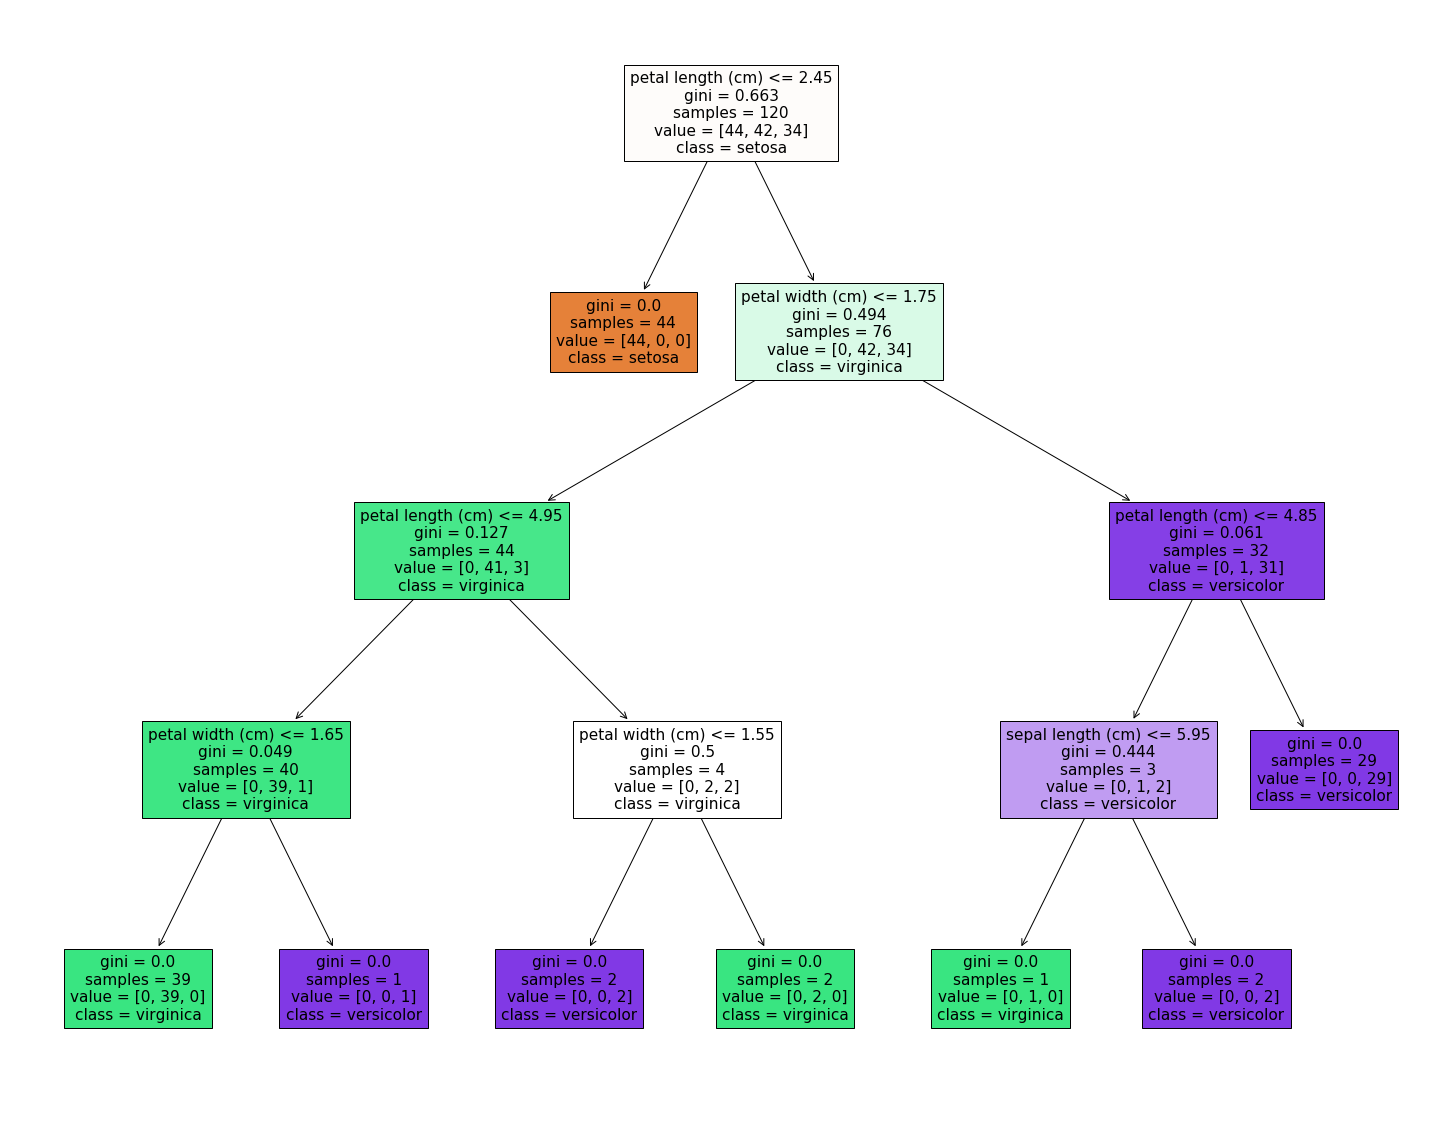

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'], 
                   class_names=['setosa','virginica','versicolor'],
                   filled=True)

It is observed thet all the leaf nodes are homogenous